**[LeetCode Link](https://leetcode-cn.com/problems/binary-tree-preorder-traversal/solution/er-cha-shu-de-qian-xu-bian-li-by-leetcode/)**

## DFS递归

In [ ]:
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:

        def helper(root):
            if not root: return 
            res.append(root.val)
            helper(root.left)
            helper(root.right)

        res = []
        helper(root)
        return res

## DFS迭代
### 算法复杂度
* 时间复杂度：访问每个节点恰好一次，时间复杂度为 O(N) ，其中 N 是节点的个数，也就是树的大小。
* 空间复杂度：取决于树的结构，最坏情况存储整棵树，因此空间复杂度是 O(N)。

In [ ]:
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        if not root: return []
        res = []
        stack = [root,]
        while stack:
            root = stack.pop()
            res.append(root.val)
            if root.right: stack.append(root.right)
            if root.left: stack.append(root.left)
        return res

## 莫里斯遍历（见笔记详细说明）
### 算法
算法的思路是从当前节点向下访问先序遍历的前驱节点，每个前驱节点都恰好被访问两次。

* 首先从当前节点开始，向左孩子走一步然后沿着右孩子一直向下访问，直到到达一个叶子节点（当前节点的中序遍历前驱节点），所以我们更新输出并建立一条伪边```predecessor.right = root```更新这个前驱的下一个点。如果我们第二次访问到前驱节点，由于已经指向了当前节点，我们移除伪边并移动到下一个顶点。
* 如果第一步向左的移动不存在，就直接更新输出并向右移动。

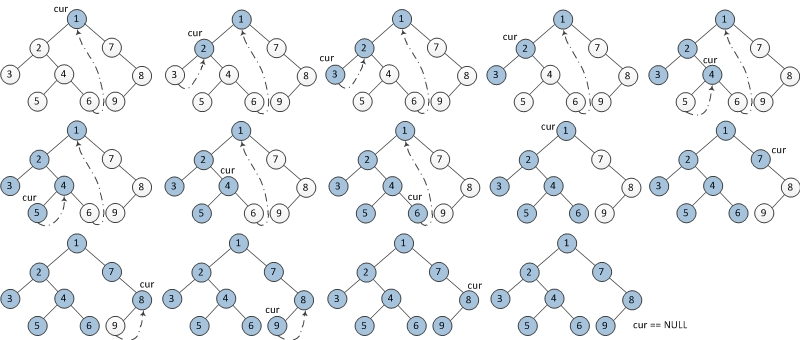

In [ ]:
class Solution(object):
    def preorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        node, output = root, []
        while node:  
            if not node.left: 
                output.append(node.val)
                node = node.right 
            else: 
                predecessor = node.left 

                while predecessor.right and predecessor.right is not node: 
                    predecessor = predecessor.right 

                if not predecessor.right:
                    output.append(node.val)
                    predecessor.right = node  
                    node = node.left  
                else:
                    predecessor.right = None
                    node = node.right         

        return output